In [1]:
import os
import glob
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
import matplotlib
import matplotlib.pyplot as plt
 
font_path = './HelveticaNeue.ttc'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['YourFontName'] + plt.rcParams['font.serif']
plt.rcParams["font.weight"] = "normal"
matplotlib.font_manager.fontManager.addfont(font_path)

In [13]:
def sample(x, y, upper_value, lower_value):
    sampled_x = [x[idx] for idx in range(0, len(x)) if y[idx] <= upper_value and y[idx] >= lower_value]
    sampled_y = [y[idx] for idx in range(0, len(y)) if y[idx] <= upper_value and y[idx] >= lower_value]
    return sampled_x, sampled_y

def smooth(x, y, window_size):
    window = np.ones(window_size)/window_size
    return x[window_size-1:], np.convolve(y, window, mode='valid')


Text(0.5, 1.0, '1B')

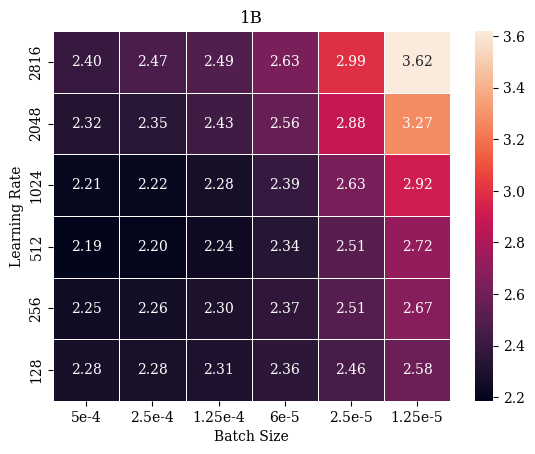

In [3]:
import seaborn as sns


batch_size_list = [2816, 2048, 1024, 512, 256, 128]
lr_list = ['5e-4_5e-5', '2.5e-4_2.5e-5', '1.25e-4_1.25e-5', '6e-5_6e-6', '2.5e-5_2.5e-6', '1.25e-5_1.25e-6']
model_size = '1B'

training_loss_data = []
for bs in batch_size_list:
    training_loss_data_bs = []
    for LR in lr_list:
        csv_name = path_save + 'llama_' + model_size + filename_prefix%(LR,bs,LR)
        loss_df = pd.read_csv(csv_name + '.csv')
        y = np.array(loss_df['Value'].values)[-1]
        training_loss_data_bs.append(y)
    training_loss_data.append(training_loss_data_bs)
    
ax = sns.heatmap(training_loss_data, annot=True, fmt=".2f", linewidth=.5, yticklabels=batch_size_list, xticklabels=[_.split('_')[0]for _ in lr_list])
ax.set(xlabel="Batch Size", ylabel="Learning Rate")
ax.tick_params(axis='both', labelsize=10)
plt.title('1B')
# plt.savefig('batch_size_learning_rate_1b.pdf', bbox_inches='tight')

Text(0.5, 1.0, '500M')

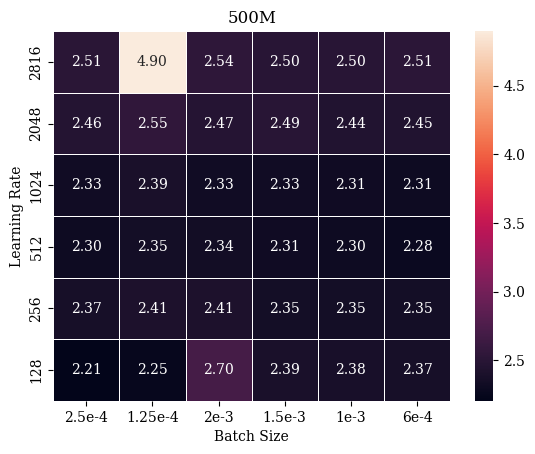

In [5]:
import seaborn as sns

batch_size_list = [2816, 2048, 1024, 512, 256, 128]
lr_list = ['2.5e-4_2.5e-5', '1.25e-4_1.25e-5', '2e-3_2e-4', '1.5e-3_1.5e-4', '1e-3_1e-4', '6e-4_6e-5']
model_size = '500M'

training_loss_data = []
for bs in batch_size_list:
    training_loss_data_bs = []
    for LR in lr_list:
        csv_name = path_save + 'llama_' + model_size + filename_prefix%(LR,bs,LR)
        loss_df = pd.read_csv(csv_name + '.csv')
        y = np.array(loss_df['Value'].values)[-1]
        training_loss_data_bs.append(y)
    training_loss_data.append(training_loss_data_bs)
    
ax = sns.heatmap(training_loss_data, annot=True, fmt=".2f", linewidth=.5, yticklabels=batch_size_list, xticklabels=[_.split('_')[0]for _ in lr_list])
ax.set(xlabel="Batch Size", ylabel="Learning Rate")
ax.tick_params(axis='both', labelsize=10)
plt.title('500M')
# plt.savefig('batch_size_learning_rate_500m.pdf', bbox_inches='tight')

Text(0.5, 1.0, '100M')

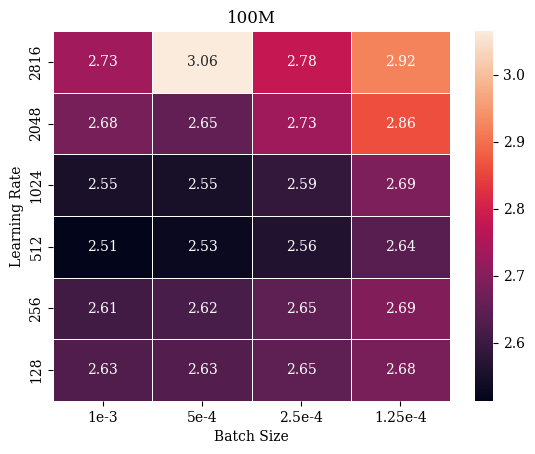

In [6]:
import seaborn as sns


batch_size_list = [2816, 2048, 1024, 512, 256, 128]
lr_list = ['1e-3_1e-4', '5e-4_5e-5', '2.5e-4_2.5e-5', '1.25e-4_1.25e-5']
model_size = '100M'

training_loss_data = []
for bs in batch_size_list:
    training_loss_data_bs = []
    for LR in lr_list:
        csv_name = path_save + 'llama_' + model_size + filename_prefix%(LR,bs,LR)
        loss_df = pd.read_csv(csv_name + '.csv')
        y = np.array(loss_df['Value'].values)[-1]
        training_loss_data_bs.append(y)
    training_loss_data.append(training_loss_data_bs)
    
ax = sns.heatmap(training_loss_data, annot=True, fmt=".2f", linewidth=.5, yticklabels=batch_size_list, xticklabels=[_.split('_')[0]for _ in lr_list])
ax.set(xlabel="Batch Size", ylabel="Learning Rate")
ax.tick_params(axis='both', labelsize=10)
plt.title('100M')
# plt.savefig('batch_size_learning_rate_100m.pdf', bbox_inches='tight')

Text(0.5, 1.0, '50M')

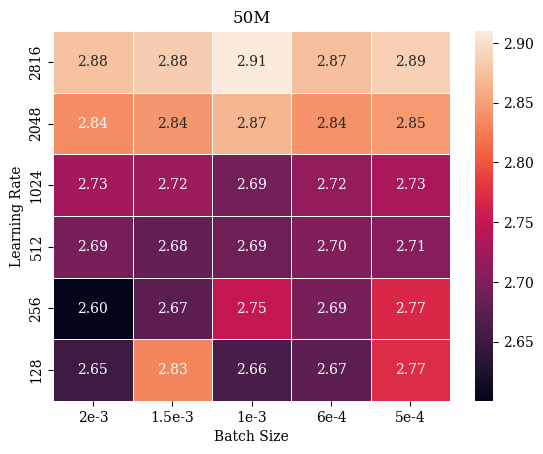

In [7]:
import seaborn as sns


batch_size_list = [2816, 2048, 1024, 512, 256, 128]

lr_list = ['2e-3_2e-4','1.5e-3_1.5e-4','1e-3_1e-4','6e-4_6e-5','5e-4_5e-5']
model_size = '50M'

training_loss_data = []
for bs in batch_size_list:
    training_loss_data_bs = []
    for LR in lr_list:
        csv_name = path_save + 'llama_' + model_size + filename_prefix%(LR,bs,LR)
        loss_df = pd.read_csv(csv_name + '.csv')
        y = np.array(loss_df['Value'].values)[-1]
        training_loss_data_bs.append(y)
    training_loss_data.append(training_loss_data_bs)
    
ax = sns.heatmap(training_loss_data, annot=True, fmt=".2f", linewidth=.5, yticklabels=batch_size_list, xticklabels=[_.split('_')[0]for _ in lr_list])
ax.set(xlabel="Batch Size", ylabel="Learning Rate")
ax.tick_params(axis='both', labelsize=10)
plt.title('50M')
# plt.savefig('batch_size_learning_rate_50m.pdf', bbox_inches='tight')

In [9]:
sampled_points_loss = []
sampled_points_FLOP = []
sampled_points_ratio = []

k,b: -0.091 6.037
k,b: -0.095 6.229
k,b: -0.092 6.078
k,b: -0.094 6.193


Text(0.5, 1.0, 'Training Loss vs Compute Budget')

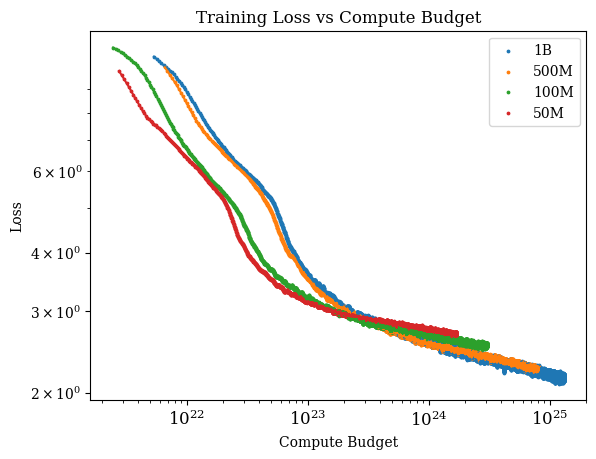

In [16]:
window_size = 20
x = np.array(loss_df_1B.Step)[::2] * 131.24 * (10 ** 12)
y = np.array(loss_df_1B.Value)[::2]

x, y = smooth(x, y, window_size)
sampled_points_loss.extend(list(y))
sampled_points_FLOP.extend(list(x))
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.scatter(x, y, s=3, label='1B')
plt.plot(x, y)

x = np.array(loss_df_500M.Step)[::2] * 80.71 * (10 ** 12)
y = np.array(loss_df_500M.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_loss.extend(list(y))
sampled_points_FLOP.extend(list(x))
plt.scatter(x, y, s=3, label='500M')
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.plot(x, y)

x = np.array(loss_df_100M.Step)[::2] * 30.17 * (10 ** 12)
y = np.array(loss_df_100M.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_loss.extend(list(y))
sampled_points_FLOP.extend(list(x))
plt.scatter(x, y, s=3, label='100M')
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.plot(x, y)

x = np.array(loss_df_50M.Step)[::2] * 16.91 * (10 ** 12)
y = np.array(loss_df_50M.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_loss.extend(list(y))
sampled_points_FLOP.extend(list(x))
plt.scatter(x, y, s=3, label='50M')
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.plot(x, y)

plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.set_xlabel('Compute Budget', fontsize=10) 
ax.set_ylabel('Loss', fontsize=10)

ax.tick_params(axis='both', labelsize=12)
plt.yticks([2.0,3.0,4.0], fontsize=10)

plt.legend()
plt.title('Training Loss vs Compute Budget')
# plt.savefig('training_loss_flops_truncated.pdf', bbox_inches='tight')

k,b: -0.091 1.167
k,b: -0.095 1.287
k,b: -0.092 1.526
k,b: -0.094 1.662


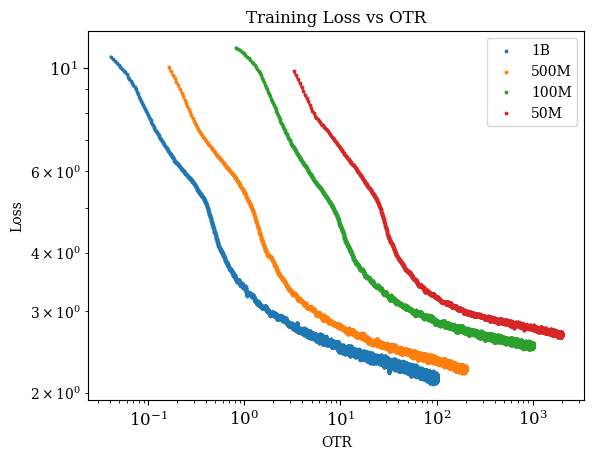

In [17]:
window_size = 20
x = np.array(loss_df_1B.Step)[::2]/(1 * (10 ** 9))
y = np.array(loss_df_1B.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_ratio.extend(list(x))
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.scatter(x, y, s=3, label='1B')
plt.plot(x, y)

x = np.array(loss_df_500M.Step)[::2]/(500 * (10 ** 6))
y = np.array(loss_df_500M.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_ratio.extend(list(x))
plt.scatter(x, y, s=3, label='500M')
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.plot(x, y)


x = np.array(loss_df_100M.Step)[::2]/(100 * (10 ** 6))
y = np.array(loss_df_100M.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_ratio.extend(list(x))
plt.scatter(x, y, s=3, label='100M')
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.plot(x, y)


x = np.array(loss_df_50M.Step)[::2]/(50 * (10 ** 6))
y = np.array(loss_df_50M.Value)[::2]
x, y = smooth(x, y, window_size)
sampled_points_ratio.extend(list(x))
plt.scatter(x, y, s=3, label='50M')
coeffs = np.polyfit(np.log(x), np.log(y), deg=1)
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')
ax = plt.gca() 
ax.set_xlabel('OTR', fontsize=10) 
ax.set_ylabel('Loss', fontsize=10)

ax.tick_params(axis='both', labelsize=12)
plt.legend()
plt.title('Training Loss vs OTR')
# plt.savefig('training_loss_otr.pdf', bbox_inches='tight')
plt.show()

324501 324501 108167


<Figure size 2000x2000 with 0 Axes>

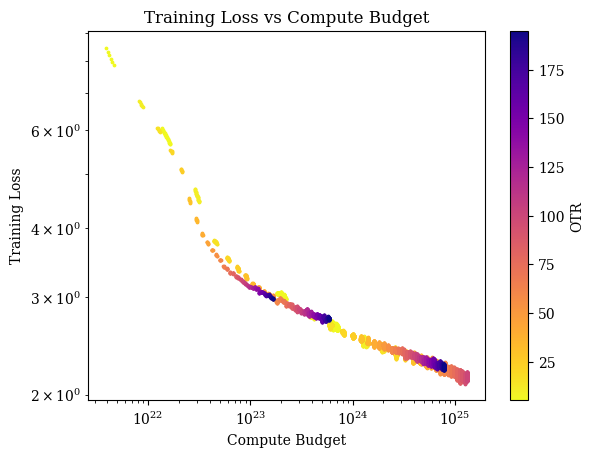

In [19]:
y = np.array(sampled_points_loss)
x = np.array(sampled_points_FLOP)
z = np.array(sampled_points_ratio)
threshold = 5

plt.figure(figsize=(20,20))
sampled_ratio = np.arange(threshold, 200, threshold)
cmap = plt.get_cmap('plasma_r')
norm = plt.Normalize(min(sampled_ratio), max(sampled_ratio))
fig, ax = plt.subplots()

for _ratio in sampled_ratio:
    sampled_x = []
    sampled_y = []
    for idx in range(len(z)):
        if np.abs(z[idx] - _ratio) < 0.5:
            sampled_x.append(x[idx])
            sampled_y.append(y[idx])
    plt.scatter(sampled_x, sampled_y, s = 3, color = cmap(norm(_ratio)))
plt.xscale('log')
plt.yscale('log')

ax = plt.gca() 
ax.set_xlabel('Compute Budget', fontsize=10)
ax.set_ylabel('Training Loss', fontsize=10)
plt.title('Training Loss vs Compute Budget')
ax.tick_params(axis='both', labelsize=10)
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('OTR')
# plt.savefig('loss_compute_otr_analysis.pdf', bbox_inches='tight')
plt.show()

OTR 10 627 :
k,b: -0.156 9.565 0.025608282926883538
OTR 20 626 :
k,b: -0.113 7.196 0.01883329706976088
OTR 25 625 :
k,b: -0.105 6.751 0.016588045232528943
OTR 30 626 :
k,b: -0.096 6.262 0.013530636480743277
OTR 40 626 :
k,b: -0.086 5.692 0.010185855871606234
OTR 50 626 :
k,b: -0.081 5.437 0.00861859218757347
OTR 60 625 :
k,b: -0.077 5.211 0.008956753163458165
OTR 70 626 :
k,b: -0.078 5.26 0.006810088974002057


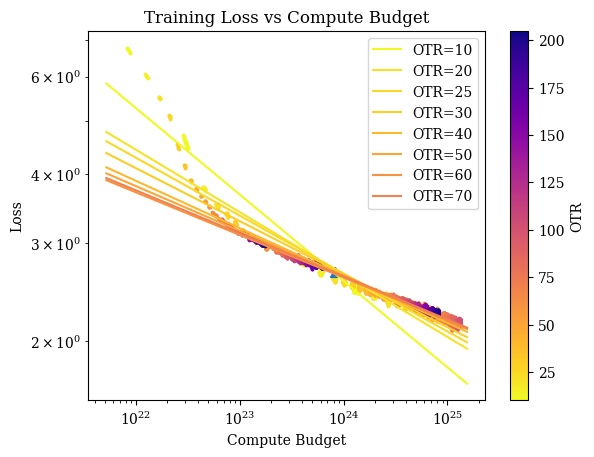

In [21]:
import math
y = np.array(sampled_points_loss)
x = np.array(sampled_points_FLOP)
z = np.array(sampled_points_ratio)
otr_list = []

sampled_ratio = np.arange(10, 210, threshold)
cmap = plt.get_cmap('plasma_r')
norm = plt.Normalize(min(sampled_ratio), max(sampled_ratio))
fig, ax = plt.subplots()
for _ratio in sampled_ratio:
    sampled_x = []
    sampled_y = []
    for idx in range(len(z)):
        if np.abs(z[idx] - _ratio) < 0.5:
            sampled_x.append(x[idx])
            sampled_y.append(y[idx])
    plt.scatter(sampled_x, sampled_y, s = 3, color = cmap(norm(_ratio)))
    if len(sampled_x) >= 3 and _ratio in [10, 20, 25, 30, 40, 50, 60, 70]:
        coeffs = np.polyfit(np.log(sampled_x), np.log(sampled_y), deg=1)
        f = np.poly1d(coeffs)
        mse = np.average(np.abs(f(np.log(sampled_x)) - np.log(sampled_y)))
        print("OTR",_ratio, len(sampled_x),":")
        print('k,b:', round(coeffs[0],3), round(coeffs[1],3), mse)
        f = np.poly1d(coeffs)
        if mse < 0.5:
            otr_list.append([_ratio, coeffs[0], coeffs[1]])
            pseudo_x = np.arange(50, 59, 1) 
            plt.plot(np.exp(pseudo_x), np.exp(f(pseudo_x)), color = cmap(norm(_ratio)), label='OTR={}'.format(_ratio))
        
coeffs = np.polyfit(np.array(otr_list)[:,1], np.array(otr_list)[:,2], deg=1)
plt.scatter(math.exp(-1*(coeffs[0])),math.exp(coeffs[1]),s = 50,zorder = 1,marker = '^')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Compute Budget')
plt.ylabel('Loss')


ax = plt.gca() 
ax.set_xlabel('Compute Budget', fontsize=10)
ax.set_ylabel('Loss', fontsize=10)
ax.tick_params(axis='both', labelsize=10) 

plt.title('Training Loss vs Compute Budget')
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('OTR')
# plt.savefig('overtrained_ratio_analysis_otr_v2.pdf', bbox_inches='tight')
plt.show()

OTR 205 :
k,b: -55.077 0.981


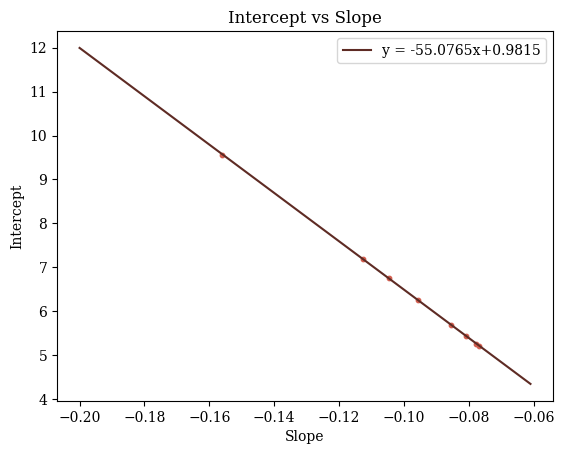

In [22]:
plt.scatter(np.array(otr_list)[:,1], np.array(otr_list)[:,2],color = '#d46051', s=10)
coeffs = np.polyfit(np.array(otr_list)[:,1], np.array(otr_list)[:,2], deg=1)
f = np.poly1d(coeffs)
pseudo_x = np.arange(-0.2,-0.06, 0.001) 
plt.plot(pseudo_x, f(pseudo_x),color = '#5e2b24',label='y = {}x+{}'.format(round(coeffs[0],4), round(coeffs[1],4)))
    
print("OTR",_ratio, ":")
print('k,b:', round(coeffs[0],3), round(coeffs[1],3))

ax = plt.gca()
ax.set_xlabel('Slope', fontsize=10)
ax.set_ylabel('Intercept', fontsize=10)

plt.title('Intercept vs Slope')
plt.legend()
ax.tick_params(axis='both', labelsize=10)
# plt.savefig('overtrained_ratio_analysis_slope_intercept.pdf', bbox_inches='tight')
plt.show()

[-2.13373282e-05  7.89360292e-02]
0.3049466326221606


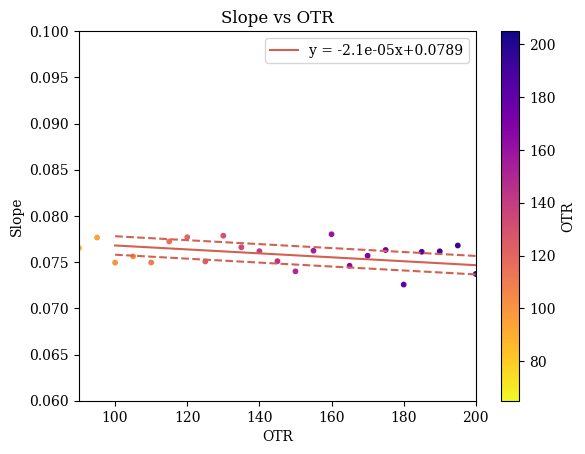

In [1145]:
from sklearn.metrics import r2_score,mean_absolute_error

x = np.array(otr_list)[:,0]
y = abs(np.array(otr_list)[:,1])
z = x

cmap = plt.get_cmap('plasma_r')
norm = plt.Normalize(min(x), max(x))
fig, ax = plt.subplots()


coeffs = np.polyfit(x, y, deg=1)
f = np.poly1d(coeffs)
print(coeffs)
pseudo_x = np.arange(100, 200, 0.001) 
plt.plot(pseudo_x, f(pseudo_x),color = '#d46051',label='y = {}x+{}'.format(round(coeffs[0],6), round(coeffs[1],4)))
plt.plot(pseudo_x, f(pseudo_x)- 0.001 , linestyle='--', color = '#d46051')
plt.plot(pseudo_x, f(pseudo_x)+ 0.001 , linestyle='--', color = '#d46051')

r2 = r2_score(y, f(x))
print(r2)

plt.scatter(x, y, s = 10, color = cmap(norm(z)))
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

# plt.xlim(9,200)

plt.xlim(90,200)
plt.ylim(0.06,0.1)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('OTR')

plt.title('Slope vs OTR')
ax.set_xlabel('OTR', fontsize=10)  # 设置X轴标签的字体大小
ax.set_ylabel('Slope', fontsize=10)  # 设置Y轴标签的字体大小
# plt.savefig('overtrained_ratio_analysis_slope_high_otr.pdf', bbox_inches='tight')


In [1147]:
import numpy as np
import statsmodels.api as sm


# Fit a linear regression model
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Get the slope of the fitted line
slope = results.params[1]

# Perform a t-test to evaluate the slope against the hypothesized value of -0.15
d1 = sm.stats.DescrStatsW(y)
print('t-statistic=%0.4f, p-value=%0.4e, df=%s' %d1.ttest_mean(results.params[0]))

# Print the results
print(f"Slope: {slope:.3f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     11.85
Date:                Fri, 10 May 2024   Prob (F-statistic):            0.00190
Time:                        19:49:38   Log-Likelihood:                 150.52
No. Observations:                  29   AIC:                            -297.0
Df Residuals:                      27   BIC:                            -294.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0789      0.001     90.090      0.0